In [1]:
import pandas as pd #for working with dataframe
import numpy as np
from scipy import stats, integrate #will help in stats operation in histograms
import matplotlib.pyplot as plt #to plot the PE
import seaborn as sns #nice looking plots
%matplotlib inline
sns.set(color_codes=True)

In [2]:
pd.options.display.max_columns=40

In [3]:
flatdata_adjusted=pd.read_csv('Figures/flatdata_adjusted.csv')
flatdata_adjusted

,BriefDescription,ProjectYear,InternalProjectID,ImprovementType,AreaTypeFuncClass,main_ProjectInformation.State,TollType,TrafficForecast,ForecastYear,ForecastYearType,YearForecastProduced,ForecastingAgency,ForecastMethodology,SegmentDescription,ProjectID,SegmentID,CountID,Year_ofObservation,Count,Station_Identifier,main_TrafficCounts.State,CounterID,FunctionalClass,AdjustedForecast,Error,PercentError,AbsPE
0,NaN,2006.0,2320,12,3.0,WI,No Tolls on 1+ lane,34000,2007,1,2006.0,1-State DOT,1,NaN,58-6302-2320-,NaN,58-22417-401399,2007,31500,401399.0,Wisconsin,58-22417-401399,3,34000.0,2500.0,7.352941,7.352941
1,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,30000,2011,1,2007.0,1-State DOT,1,NaN,58-6303-2467-,NaN,58-22419-404512,2011,22200,404512.0,Wisconsin,58-22419-404512,3,30000.0,7800.0,26.000000,26.000000
2,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,19000,2011,1,2007.0,1-State DOT,1,NaN,58-6304-2467-,NaN,58-22421-404513,2011,20100,404513.0,Wisconsin,58-22421-404513,3,19000.0,-1100.0,-5.789474,5.789474
3,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,21900,2011,1,2007.0,1-State DOT,1,NaN,58-6305-2467-,NaN,58-22423-404524,2011,18400,404524.0,Wisconsin,58-22423-404524,4,21900.0,3500.0,15.981735,15.981735
4,NaN,2006.0,2322,12,3.0,WI,No Tolls on 1+ lane,22700,2009,1,2006.0,1-State DOT,1,NaN,58-6306-2322-,NaN,58-22425-401843,2009,22600,401843.0,Wisconsin,58-22425-401843,3,22700.0,100.0,0.440529,0.440529
5,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,2800,2011,1,2007.0,1-State DOT,1,NaN,58-6307-2467-,NaN,58-22427-404541,2011,2500,404541.0,Wisconsin,58-22427-404541,5,2800.0,300.0,10.714286,10.714286
6,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,33500,2011,1,2007.0,1-State DOT,1,NaN,58-6308-2467-,NaN,58-22429-404545,2011,33500,404545.0,Wisconsin,58-22429-404545,3,33500.0,0.0,0.000000,0.000000
7,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,1500,2011,1,2007.0,1-State DOT,1,NaN,58-6309-2467-,NaN,58-22431-404547,2011,2200,404547.0,Wisconsin,58-22431-404547,7,1500.0,-700.0,-46.666667,46.666667
8,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,23800,2011,1,2007.0,1-State DOT,1,NaN,58-6310-2467-,NaN,58-22433-404548,2011,25400,404548.0,Wisconsin,58-22433-404548,3,23800.0,-1600.0,-6.722689,6.722689
9,NaN,2006.0,2373,12,1.0,WI,No Tolls on 1+ lane,8600,2008,1,2006.0,1-State DOT,1,NaN,58-6311-2373-,NaN,58-22435-510108,2008,6600,510108.0,Wisconsin,58-22435-510108,3,8600.0,2000.0,23.255814,23.255814


In [4]:
flatdata_adjusted=flatdata_adjusted.assign(DiffYear=flatdata_adjusted['ForecastYear']-flatdata_adjusted['YearForecastProduced'])

In [13]:
averagecount=flatdata_adjusted['Count'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='AverageCount')
averageforecast=flatdata_adjusted['AdjustedForecast'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='AverageForecast')
improvement_type=flatdata_adjusted['ImprovementType'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='ImprovementType')
forecast_method=flatdata_adjusted['ForecastMethodology'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='Forecast_Method')
func_class=flatdata_adjusted['FunctionalClass'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='Func_Class')
diff_year=flatdata_adjusted['DiffYear'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='Diff_Year')
#project_error=pd.merge(averagecount,averageforecast,left_on='InternalProjectID')
#project_error
#func_class

In [14]:
flatdata_adjusted_year=flatdata_adjusted[flatdata_adjusted['DiffYear']>=0]
flatdata_adjusted_year

,BriefDescription,ProjectYear,InternalProjectID,ImprovementType,AreaTypeFuncClass,main_ProjectInformation.State,TollType,TrafficForecast,ForecastYear,ForecastYearType,YearForecastProduced,ForecastingAgency,ForecastMethodology,SegmentDescription,ProjectID,SegmentID,CountID,Year_ofObservation,Count,Station_Identifier,main_TrafficCounts.State,CounterID,FunctionalClass,AdjustedForecast,Error,PercentError,AbsPE,Comments,DiffYear
0,NaN,2006.0,2320,12,3.0,WI,No Tolls on 1+ lane,34000,2007,1,2006.0,1-State DOT,1,NaN,58-6302-2320-,NaN,58-22417-401399,2007,31500,401399.0,Wisconsin,58-22417-401399,3,34000.0,2500.0,7.352941,7.352941,NaN,1.0
1,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,30000,2011,1,2007.0,1-State DOT,1,NaN,58-6303-2467-,NaN,58-22419-404512,2011,22200,404512.0,Wisconsin,58-22419-404512,3,30000.0,7800.0,26.000000,26.000000,NaN,4.0
2,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,19000,2011,1,2007.0,1-State DOT,1,NaN,58-6304-2467-,NaN,58-22421-404513,2011,20100,404513.0,Wisconsin,58-22421-404513,3,19000.0,-1100.0,-5.789474,5.789474,NaN,4.0
3,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,21900,2011,1,2007.0,1-State DOT,1,NaN,58-6305-2467-,NaN,58-22423-404524,2011,18400,404524.0,Wisconsin,58-22423-404524,4,21900.0,3500.0,15.981735,15.981735,NaN,4.0
4,NaN,2006.0,2322,12,3.0,WI,No Tolls on 1+ lane,22700,2009,1,2006.0,1-State DOT,1,NaN,58-6306-2322-,NaN,58-22425-401843,2009,22600,401843.0,Wisconsin,58-22425-401843,3,22700.0,100.0,0.440529,0.440529,NaN,3.0
5,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,2800,2011,1,2007.0,1-State DOT,1,NaN,58-6307-2467-,NaN,58-22427-404541,2011,2500,404541.0,Wisconsin,58-22427-404541,5,2800.0,300.0,10.714286,10.714286,NaN,4.0
6,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,33500,2011,1,2007.0,1-State DOT,1,NaN,58-6308-2467-,NaN,58-22429-404545,2011,33500,404545.0,Wisconsin,58-22429-404545,3,33500.0,0.0,0.000000,0.000000,NaN,4.0
7,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,1500,2011,1,2007.0,1-State DOT,1,NaN,58-6309-2467-,NaN,58-22431-404547,2011,2200,404547.0,Wisconsin,58-22431-404547,7,1500.0,-700.0,-46.666667,46.666667,NaN,4.0
8,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,23800,2011,1,2007.0,1-State DOT,1,NaN,58-6310-2467-,NaN,58-22433-404548,2011,25400,404548.0,Wisconsin,58-22433-404548,3,23800.0,-1600.0,-6.722689,6.722689,NaN,4.0
9,NaN,2006.0,2373,12,1.0,WI,No Tolls on 1+ lane,8600,2008,1,2006.0,1-State DOT,1,NaN,58-6311-2373-,NaN,58-22435-510108,2008,6600,510108.0,Wisconsin,58-22435-510108,3,8600.0,2000.0,23.255814,23.255814,NaN,2.0


In [69]:
#ax=sns.boxplot(flatdata_adjusted_year['DiffYear'],flatdata_adjusted_year['AbsPE'])
#ax.figure.set_size_inches(20,10)
#ax.set_xlim(0
#            ,20)
#ax.set_ylim(-50,200)
#ax.figure.savefig('boxplotyear.png')

In [70]:
#ax=sns.boxplot(flatdata_adjusted_year['YearForecastProduced'],flatdata_adjusted_year['AbsPE'])
#ax.figure.set_size_inches(15,10)
#ax.set_xlim(20,40)
#ax.set_ylim(-50,200)
#ax.figure.savefig('boxplotyearforecastproduced.png')

In [5]:
bins=[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,180000]
flatdata_adjusted.groupby(pd.cut(flatdata_adjusted['TrafficForecast'], bins)).AbsPE.describe()

,count,mean,std,min,25%,50%,75%,max
TrafficForecast,,,,,,,,
"(0, 10000]",1460.0,48.207575,140.627721,0.000000,8.108108,18.518519,38.724861,2142.424242
"(10000, 20000]",1113.0,34.868954,63.801589,0.000000,8.146067,18.493151,39.644970,1096.781076
"(20000, 30000]",766.0,35.261656,41.885315,0.000000,9.749494,21.605029,45.283511,258.353511
"(30000, 40000]",440.0,29.634179,27.693087,0.000000,8.949836,19.691357,45.194478,132.394366
"(40000, 50000]",304.0,25.633730,24.108895,0.002352,7.101798,17.647059,36.144578,96.319018
"(50000, 60000]",200.0,20.732889,18.203879,0.000000,4.162844,14.229822,37.138838,64.772727
"(60000, 70000]",91.0,14.935175,18.885863,0.004372,2.232640,9.814802,20.749351,124.777448
"(70000, 80000]",55.0,8.874166,8.885316,0.001600,2.470558,5.433287,17.241379,39.355742
"(80000, 90000]",44.0,12.809930,8.861811,0.001292,5.372229,12.532704,19.336384,30.713713


In [6]:
flatdata_grouped=flatdata_adjusted.groupby(pd.cut(flatdata_adjusted['TrafficForecast'], bins)).AbsPE.describe()
#grouped statistics of the Absolute Percent Error
flatdata_grouped

,count,mean,std,min,25%,50%,75%,max
TrafficForecast,,,,,,,,
"(0, 10000]",1460.0,48.207575,140.627721,0.000000,8.108108,18.518519,38.724861,2142.424242
"(10000, 20000]",1113.0,34.868954,63.801589,0.000000,8.146067,18.493151,39.644970,1096.781076
"(20000, 30000]",766.0,35.261656,41.885315,0.000000,9.749494,21.605029,45.283511,258.353511
"(30000, 40000]",440.0,29.634179,27.693087,0.000000,8.949836,19.691357,45.194478,132.394366
"(40000, 50000]",304.0,25.633730,24.108895,0.002352,7.101798,17.647059,36.144578,96.319018
"(50000, 60000]",200.0,20.732889,18.203879,0.000000,4.162844,14.229822,37.138838,64.772727
"(60000, 70000]",91.0,14.935175,18.885863,0.004372,2.232640,9.814802,20.749351,124.777448
"(70000, 80000]",55.0,8.874166,8.885316,0.001600,2.470558,5.433287,17.241379,39.355742
"(80000, 90000]",44.0,12.809930,8.861811,0.001292,5.372229,12.532704,19.336384,30.713713


In [11]:
#grouped_2

In [28]:
#flatdata_grouped=pd.read_csv('flatdata_grouped.csv')
#flatdata_grouped

In [7]:
flatdata_grouped=flatdata_grouped.assign(LowerLimit=flatdata_grouped['mean']-1.645*flatdata_grouped['std']/np.sqrt(flatdata_grouped['count']))
flatdata_grouped

,count,mean,std,min,25%,50%,75%,max,LowerLimit
TrafficForecast,,,,,,,,,
"(0, 10000]",1460.0,48.207575,140.627721,0.000000,8.108108,18.518519,38.724861,2142.424242,42.153324
"(10000, 20000]",1113.0,34.868954,63.801589,0.000000,8.146067,18.493151,39.644970,1096.781076,31.723019
"(20000, 30000]",766.0,35.261656,41.885315,0.000000,9.749494,21.605029,45.283511,258.353511,32.772149
"(30000, 40000]",440.0,29.634179,27.693087,0.000000,8.949836,19.691357,45.194478,132.394366,27.462423
"(40000, 50000]",304.0,25.633730,24.108895,0.002352,7.101798,17.647059,36.144578,96.319018,23.359123
"(50000, 60000]",200.0,20.732889,18.203879,0.000000,4.162844,14.229822,37.138838,64.772727,18.615431
"(60000, 70000]",91.0,14.935175,18.885863,0.004372,2.232640,9.814802,20.749351,124.777448,11.678442
"(70000, 80000]",55.0,8.874166,8.885316,0.001600,2.470558,5.433287,17.241379,39.355742,6.903298
"(80000, 90000]",44.0,12.809930,8.861811,0.001292,5.372229,12.532704,19.336384,30.713713,10.612262


In [8]:
flatdata_grouped=flatdata_grouped.assign(UpperLimit=flatdata_grouped['mean']+1.645*flatdata_grouped['std']/np.sqrt(flatdata_grouped['count']))
flatdata_grouped

,count,mean,std,min,25%,50%,75%,max,LowerLimit,UpperLimit
TrafficForecast,,,,,,,,,,
"(0, 10000]",1460.0,48.207575,140.627721,0.000000,8.108108,18.518519,38.724861,2142.424242,42.153324,54.261826
"(10000, 20000]",1113.0,34.868954,63.801589,0.000000,8.146067,18.493151,39.644970,1096.781076,31.723019,38.014890
"(20000, 30000]",766.0,35.261656,41.885315,0.000000,9.749494,21.605029,45.283511,258.353511,32.772149,37.751163
"(30000, 40000]",440.0,29.634179,27.693087,0.000000,8.949836,19.691357,45.194478,132.394366,27.462423,31.805934
"(40000, 50000]",304.0,25.633730,24.108895,0.002352,7.101798,17.647059,36.144578,96.319018,23.359123,27.908337
"(50000, 60000]",200.0,20.732889,18.203879,0.000000,4.162844,14.229822,37.138838,64.772727,18.615431,22.850348
"(60000, 70000]",91.0,14.935175,18.885863,0.004372,2.232640,9.814802,20.749351,124.777448,11.678442,18.191907
"(70000, 80000]",55.0,8.874166,8.885316,0.001600,2.470558,5.433287,17.241379,39.355742,6.903298,10.845033
"(80000, 90000]",44.0,12.809930,8.861811,0.001292,5.372229,12.532704,19.336384,30.713713,10.612262,15.007597


In [19]:
flatdata_grouped.to_csv('grouped and confidence interval.csv')

In [14]:
#grouped_2=flatdata_adjusted.groupby(pd.qcut(flatdata_adjusted['TrafficForecast'], 15)).TrafficForecast.describe()
#grouped_2

In [4]:
flatdata_fc=flatdata_adjusted[flatdata_adjusted['FunctionalClass']!=8] #known functional class
flatdata_fc

,BriefDescription,ProjectYear,InternalProjectID,ImprovementType,AreaTypeFuncClass,main_ProjectInformation.State,TollType,TrafficForecast,ForecastYear,ForecastYearType,YearForecastProduced,ForecastingAgency,ForecastMethodology,SegmentDescription,ProjectID,SegmentID,CountID,Year_ofObservation,Count,Station_Identifier,main_TrafficCounts.State,CounterID,FunctionalClass,AdjustedForecast,Error,PercentError,AbsPE,Comments
0,NaN,2006.0,2320,12,3.0,WI,No Tolls on 1+ lane,34000,2007,1,2006.0,1-State DOT,1,NaN,58-6302-2320-,NaN,58-22417-401399,2007,31500,401399.0,Wisconsin,58-22417-401399,3,34000.0,2500.0,7.352941,7.352941,NaN
1,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,30000,2011,1,2007.0,1-State DOT,1,NaN,58-6303-2467-,NaN,58-22419-404512,2011,22200,404512.0,Wisconsin,58-22419-404512,3,30000.0,7800.0,26.000000,26.000000,NaN
2,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,19000,2011,1,2007.0,1-State DOT,1,NaN,58-6304-2467-,NaN,58-22421-404513,2011,20100,404513.0,Wisconsin,58-22421-404513,3,19000.0,-1100.0,-5.789474,5.789474,NaN
3,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,21900,2011,1,2007.0,1-State DOT,1,NaN,58-6305-2467-,NaN,58-22423-404524,2011,18400,404524.0,Wisconsin,58-22423-404524,4,21900.0,3500.0,15.981735,15.981735,NaN
4,NaN,2006.0,2322,12,3.0,WI,No Tolls on 1+ lane,22700,2009,1,2006.0,1-State DOT,1,NaN,58-6306-2322-,NaN,58-22425-401843,2009,22600,401843.0,Wisconsin,58-22425-401843,3,22700.0,100.0,0.440529,0.440529,NaN
5,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,2800,2011,1,2007.0,1-State DOT,1,NaN,58-6307-2467-,NaN,58-22427-404541,2011,2500,404541.0,Wisconsin,58-22427-404541,5,2800.0,300.0,10.714286,10.714286,NaN
6,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,33500,2011,1,2007.0,1-State DOT,1,NaN,58-6308-2467-,NaN,58-22429-404545,2011,33500,404545.0,Wisconsin,58-22429-404545,3,33500.0,0.0,0.000000,0.000000,NaN
7,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,1500,2011,1,2007.0,1-State DOT,1,NaN,58-6309-2467-,NaN,58-22431-404547,2011,2200,404547.0,Wisconsin,58-22431-404547,7,1500.0,-700.0,-46.666667,46.666667,NaN
8,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,23800,2011,1,2007.0,1-State DOT,1,NaN,58-6310-2467-,NaN,58-22433-404548,2011,25400,404548.0,Wisconsin,58-22433-404548,3,23800.0,-1600.0,-6.722689,6.722689,NaN
9,NaN,2006.0,2373,12,1.0,WI,No Tolls on 1+ lane,8600,2008,1,2006.0,1-State DOT,1,NaN,58-6311-2373-,NaN,58-22435-510108,2008,6600,510108.0,Wisconsin,58-22435-510108,3,8600.0,2000.0,23.255814,23.255814,NaN


5

In [5]:
def numberoflanes1(x):
    import math
    if x.FunctionalClass<4:
        ddhv=x.TrafficForecast*0.09*.5
        n=ddhv/2400
    elif x.FunctionalClass==4:
        if x.AreaTypeFuncClass<3:
            ddhv=x.TrafficForecast*0.09*.5
            n=ddhv/(800*0.9)
        else:
            ddhv=x.TrafficForecast*0.09*.5
            n=ddhv/(800*0.8) 
    elif x.FunctionalClass==5:
        if x.AreaTypeFuncClass<3:
            ddhv=x.TrafficForecast*0.09*.5
            n=ddhv/(600*0.9)
        else:
            ddhv=x.TrafficForecast*0.09*.5
            n=ddhv/(600*0.8)
    elif x.FunctionalClass==6:
        if x.AreaTypeFuncClass<3:
            ddhv=x.TrafficForecast*0.09*.5
            n=ddhv/(600*0.9)
        else:
            ddhv=x.TrafficForecast*0.09*.5
            n=ddhv/(600*0.8)
    else:
        n=2
    return math.ceil(n)

def numberoflanes2(x):
    import math
    if x.FunctionalClass<4:
        ddhv=x.Count*0.09*.5
        n=ddhv/2400
    elif x.FunctionalClass==4:
        if x.AreaTypeFuncClass<3:
            ddhv=x.Count*0.09*.5
            n=ddhv/(800*0.9)
        else:
            ddhv=x.Count*0.09*.5
            n=ddhv/(800*0.8) 
    elif x.FunctionalClass==5:
        if x.AreaTypeFuncClass<3:
            ddhv=x.Count*0.09*.5
            n=ddhv/(600*0.9)
        else:
            ddhv=x.Count*0.09*.5
            n=ddhv/(600*0.8)
    elif x.FunctionalClass==6:
        if x.AreaTypeFuncClass<3:
            ddhv=x.Count*0.09*.5
            n=ddhv/(600*0.9)
        else:
            ddhv=x.Count*0.09*.5
            n=ddhv/(600*0.8)
    else:
        n=2
    return math.ceil(n)

In [6]:
flatdata_fc2=flatdata_fc.assign(Forecasted_Lane=flatdata_fc.apply(numberoflanes1,axis=1))
flatdata_fc2
#number of lanes=Directional Design Hourly Volume/(Service Flow Rate * Peak Hour Factor)
#Directional Design Hourly Volume= AADT* K factor* D factor
#Service Flow Rate=several constants

,BriefDescription,ProjectYear,InternalProjectID,ImprovementType,AreaTypeFuncClass,main_ProjectInformation.State,TollType,TrafficForecast,ForecastYear,ForecastYearType,YearForecastProduced,ForecastingAgency,ForecastMethodology,SegmentDescription,ProjectID,SegmentID,CountID,Year_ofObservation,Count,Station_Identifier,main_TrafficCounts.State,CounterID,FunctionalClass,AdjustedForecast,Error,PercentError,AbsPE,Comments,Forecasted_Lane
0,NaN,2006.0,2320,12,3.0,WI,No Tolls on 1+ lane,34000,2007,1,2006.0,1-State DOT,1,NaN,58-6302-2320-,NaN,58-22417-401399,2007,31500,401399.0,Wisconsin,58-22417-401399,3,34000.0,2500.0,7.352941,7.352941,NaN,1
1,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,30000,2011,1,2007.0,1-State DOT,1,NaN,58-6303-2467-,NaN,58-22419-404512,2011,22200,404512.0,Wisconsin,58-22419-404512,3,30000.0,7800.0,26.000000,26.000000,NaN,1
2,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,19000,2011,1,2007.0,1-State DOT,1,NaN,58-6304-2467-,NaN,58-22421-404513,2011,20100,404513.0,Wisconsin,58-22421-404513,3,19000.0,-1100.0,-5.789474,5.789474,NaN,1
3,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,21900,2011,1,2007.0,1-State DOT,1,NaN,58-6305-2467-,NaN,58-22423-404524,2011,18400,404524.0,Wisconsin,58-22423-404524,4,21900.0,3500.0,15.981735,15.981735,NaN,2
4,NaN,2006.0,2322,12,3.0,WI,No Tolls on 1+ lane,22700,2009,1,2006.0,1-State DOT,1,NaN,58-6306-2322-,NaN,58-22425-401843,2009,22600,401843.0,Wisconsin,58-22425-401843,3,22700.0,100.0,0.440529,0.440529,NaN,1
5,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,2800,2011,1,2007.0,1-State DOT,1,NaN,58-6307-2467-,NaN,58-22427-404541,2011,2500,404541.0,Wisconsin,58-22427-404541,5,2800.0,300.0,10.714286,10.714286,NaN,1
6,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,33500,2011,1,2007.0,1-State DOT,1,NaN,58-6308-2467-,NaN,58-22429-404545,2011,33500,404545.0,Wisconsin,58-22429-404545,3,33500.0,0.0,0.000000,0.000000,NaN,1
7,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,1500,2011,1,2007.0,1-State DOT,1,NaN,58-6309-2467-,NaN,58-22431-404547,2011,2200,404547.0,Wisconsin,58-22431-404547,7,1500.0,-700.0,-46.666667,46.666667,NaN,2
8,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,23800,2011,1,2007.0,1-State DOT,1,NaN,58-6310-2467-,NaN,58-22433-404548,2011,25400,404548.0,Wisconsin,58-22433-404548,3,23800.0,-1600.0,-6.722689,6.722689,NaN,1
9,NaN,2006.0,2373,12,1.0,WI,No Tolls on 1+ lane,8600,2008,1,2006.0,1-State DOT,1,NaN,58-6311-2373-,NaN,58-22435-510108,2008,6600,510108.0,Wisconsin,58-22435-510108,3,8600.0,2000.0,23.255814,23.255814,NaN,1


In [7]:
flatdata_fc2=flatdata_fc2.assign(Actual_Lane=flatdata_fc.apply(numberoflanes2,axis=1))
flatdata_fc2

,BriefDescription,ProjectYear,InternalProjectID,ImprovementType,AreaTypeFuncClass,main_ProjectInformation.State,TollType,TrafficForecast,ForecastYear,ForecastYearType,YearForecastProduced,ForecastingAgency,ForecastMethodology,SegmentDescription,ProjectID,SegmentID,CountID,Year_ofObservation,Count,Station_Identifier,main_TrafficCounts.State,CounterID,FunctionalClass,AdjustedForecast,Error,PercentError,AbsPE,Comments,Forecasted_Lane,Actual_Lane
0,NaN,2006.0,2320,12,3.0,WI,No Tolls on 1+ lane,34000,2007,1,2006.0,1-State DOT,1,NaN,58-6302-2320-,NaN,58-22417-401399,2007,31500,401399.0,Wisconsin,58-22417-401399,3,34000.0,2500.0,7.352941,7.352941,NaN,1,1
1,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,30000,2011,1,2007.0,1-State DOT,1,NaN,58-6303-2467-,NaN,58-22419-404512,2011,22200,404512.0,Wisconsin,58-22419-404512,3,30000.0,7800.0,26.000000,26.000000,NaN,1,1
2,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,19000,2011,1,2007.0,1-State DOT,1,NaN,58-6304-2467-,NaN,58-22421-404513,2011,20100,404513.0,Wisconsin,58-22421-404513,3,19000.0,-1100.0,-5.789474,5.789474,NaN,1,1
3,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,21900,2011,1,2007.0,1-State DOT,1,NaN,58-6305-2467-,NaN,58-22423-404524,2011,18400,404524.0,Wisconsin,58-22423-404524,4,21900.0,3500.0,15.981735,15.981735,NaN,2,2
4,NaN,2006.0,2322,12,3.0,WI,No Tolls on 1+ lane,22700,2009,1,2006.0,1-State DOT,1,NaN,58-6306-2322-,NaN,58-22425-401843,2009,22600,401843.0,Wisconsin,58-22425-401843,3,22700.0,100.0,0.440529,0.440529,NaN,1,1
5,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,2800,2011,1,2007.0,1-State DOT,1,NaN,58-6307-2467-,NaN,58-22427-404541,2011,2500,404541.0,Wisconsin,58-22427-404541,5,2800.0,300.0,10.714286,10.714286,NaN,1,1
6,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,33500,2011,1,2007.0,1-State DOT,1,NaN,58-6308-2467-,NaN,58-22429-404545,2011,33500,404545.0,Wisconsin,58-22429-404545,3,33500.0,0.0,0.000000,0.000000,NaN,1,1
7,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,1500,2011,1,2007.0,1-State DOT,1,NaN,58-6309-2467-,NaN,58-22431-404547,2011,2200,404547.0,Wisconsin,58-22431-404547,7,1500.0,-700.0,-46.666667,46.666667,NaN,2,2
8,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,23800,2011,1,2007.0,1-State DOT,1,NaN,58-6310-2467-,NaN,58-22433-404548,2011,25400,404548.0,Wisconsin,58-22433-404548,3,23800.0,-1600.0,-6.722689,6.722689,NaN,1,1
9,NaN,2006.0,2373,12,1.0,WI,No Tolls on 1+ lane,8600,2008,1,2006.0,1-State DOT,1,NaN,58-6311-2373-,NaN,58-22435-510108,2008,6600,510108.0,Wisconsin,58-22435-510108,3,8600.0,2000.0,23.255814,23.255814,NaN,1,1


In [8]:
flatdata_fc3=flatdata_fc2[flatdata_fc2['AbsPE']<200]

In [10]:
flatdata_fc3[flatdata_fc3['Forecasted_Lane']<flatdata_fc3['Actual_Lane']].to_csv('error in lane call.csv')

In [15]:
flatdata_fc[flatdata_fc['LaneCall']>1.5]

,AdjustedForecast,BriefDescription,Count,County,ForecastMethodology,ForecastYear,ForecastYearType,FunctionalClass,ImprovementType,InternalProjectID,Length_miles,SegmentDescription,SegmentID,State,TollType,TrafficForecast,YearForecastProduced,Year_ofObservation,main_ProjectInformation_ProjectID,main_TrafficForecast_ProjectID,Error,PercentError,AbsPE,DiffYear,LaneCall
46,3300.000000,NaN,5000,Waukesha,1,2009,1.0,6,12,1745,NaN,NaN,NaN,58,1,3300,2007.0,2009,58-6277-1745-,6277.0,1700.000000,51.515152,51.515152,2.0,1.515152
55,32800.000000,NaN,49900,Waukesha,1,2009,1.0,3,12,2137,NaN,NaN,NaN,58,1,32800,2006.0,2009,58-6286-2137-,6286.0,17100.000000,52.134146,52.134146,3.0,1.521341
65,23800.000000,NaN,38000,Milwaukee,1,2009,1.0,3,12,2322,NaN,NaN,NaN,58,1,23800,2006.0,2009,58-6296-2322-,6296.0,14200.000000,59.663866,59.663866,3.0,1.596639
132,3000.000000,NaN,4700,Brown,4,2006,1.0,4,12,2214,NaN,NaN,NaN,58,1,3000,2006.0,2006,58-6363-2214-,6363.0,1700.000000,56.666667,56.666667,0.0,1.566667
162,1500.000000,NaN,3700,Chippewa,4,2011,1.0,4,12,2084,NaN,NaN,NaN,58,1,1500,2005.0,2011,58-6393-2084-,6393.0,2200.000000,146.666667,146.666667,6.0,2.466667
170,1450.000000,NaN,3000,Clark,1,2007,1.0,5,12,2298,NaN,NaN,NaN,58,1,1450,2006.0,2007,58-6401-2298-,6401.0,1550.000000,106.896552,106.896552,1.0,2.068966
2666,990.000000,NaN,2440,NaN,6,2006,NaN,5,1,23582,NaN,NaN,NaN,41,1,990,2004.0,2006,NaN,NaN,1450.000000,146.464647,146.464647,2.0,2.464646
2767,2350.000000,NaN,5440,NaN,6,2007,NaN,5,1,25679,NaN,NaN,NaN,41,1,2350,2006.0,2007,NaN,NaN,3090.000000,131.489362,131.489362,1.0,2.314894
2926,5715.833333,NaN,8680,NaN,6,2009,NaN,3,1,79449,NaN,NaN,NaN,41,1,5670,2006.0,2010,NaN,NaN,2964.166667,51.858872,51.858872,3.0,1.530864
3085,16564.000000,NaN,29190,NaN,6,2010,NaN,3,1,21755,NaN,NaN,NaN,41,1,16780,2008.0,2007,NaN,NaN,12626.000000,76.225549,76.225549,2.0,1.739571


(0, 2)

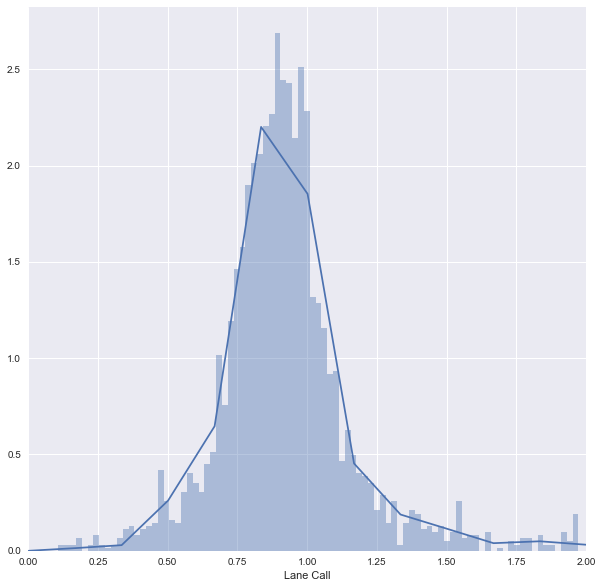

In [20]:
ax=sns.distplot(flatdata_fc['LaneCall'],bins=1000,kde=True,axlabel='Lane Call')
ax.figure.set_size_inches(10,10)
ax.set_xlim(0,2)

In [161]:
flatdata_adjusted=flatdata_adjusted.assign(Category=pd.qcut(flatdata_adjusted['TrafficForecast'], 250))
flatdata_adjusted

,AdjustedForecast,BriefDescription,Count,County,ForecastMethodology,ForecastYear,ForecastYearType,FunctionalClass,ImprovementType,InternalProjectID,Length_miles,SegmentDescription,SegmentID,State,TollType,TrafficForecast,YearForecastProduced,Year_ofObservation,main_ProjectInformation_ProjectID,main_TrafficForecast_ProjectID,Error,PercentError,AbsPE,DiffYear,Category
0,5300.0,NaN,3700,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,5300,2007.0,2010,58-6231-1663-,6231.0,-1600.0,-30.188679,30.188679,3.0,"(5226.96, 5336.32]"
1,7400.0,NaN,5500,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,7400,2007.0,2010,58-6232-1663-,6232.0,-1900.0,-25.675676,25.675676,3.0,"(7300.0, 7400.0]"
2,4150.0,NaN,2800,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,4150,2007.0,2010,58-6233-1663-,6233.0,-1350.0,-32.530120,32.530120,3.0,"(4066.36, 4200.0]"
3,3700.0,NaN,2500,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,3700,2007.0,2010,58-6234-1663-,6234.0,-1200.0,-32.432432,32.432432,3.0,"(3577.64, 3700.0]"
4,4500.0,NaN,3500,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,4500,2007.0,2010,58-6235-1663-,6235.0,-1000.0,-22.222222,22.222222,3.0,"(4440.0, 4505.08]"
5,18800.0,NaN,14000,Washington,1,2007,1.0,4,12,2015,NaN,NaN,NaN,58,1,18800,2005.0,2007,58-6236-2015-,6236.0,-4800.0,-25.531915,25.531915,2.0,"(18600.0, 18800.0]"
6,18200.0,NaN,14700,Washington,1,2007,1.0,4,12,2015,NaN,NaN,NaN,58,1,18200,2005.0,2007,58-6237-2015-,6237.0,-3500.0,-19.230769,19.230769,2.0,"(18000.0, 18200.0]"
7,19600.0,NaN,16900,Washington,1,2007,1.0,4,12,2015,NaN,NaN,NaN,58,1,19600,2005.0,2007,58-6238-2015-,6238.0,-2700.0,-13.775510,13.775510,2.0,"(19562.2, 19680.0]"
8,1300.0,NaN,1900,Washington,1,2007,1.0,8,12,2126,NaN,NaN,NaN,58,1,1300,2006.0,2007,58-6239-2126-,6239.0,600.0,46.153846,46.153846,1.0,"(1200.0, 1350.0]"
9,1300.0,NaN,1000,Washington,1,2010,1.0,5,12,2486,NaN,NaN,NaN,58,1,1300,2007.0,2010,58-6240-2486-,6240.0,-300.0,-23.076923,23.076923,3.0,"(1200.0, 1350.0]"


In [32]:
#flatdata_grouped=flatdata_grouped.drop('TrafficForecast',axis=1)
#flatdata_grouped

In [75]:
#flatdata_grouped= flatdata_grouped.rename(index=str, columns={'TrafficForecast':'Category'})
#flatdata_grouped

In [19]:
flatdata_grouped.to_csv('grouped_flat.csv')

In [162]:
flatdata_grouped=flatdata_grouped.assign(Category=flatdata_grouped.index)
flatdata_grouped

,count,mean,std,min,25%,50%,75%,max,LowerLimit,UpperLimit,Category
TrafficForecast,,,,,,,,,,,
"(169.999, 689.36]",21.0,21.991252,19.813928,0.334448,8.661417,18.909091,29.118774,83.946488,14.878678,29.103827,"(169.999, 689.36]"
"(689.36, 800.0]",22.0,35.144603,35.496805,0.420168,8.762928,20.032895,74.136513,97.916667,22.695335,47.593872,"(689.36, 800.0]"
"(800.0, 1032.12]",19.0,27.748898,33.068747,3.491272,9.726808,16.470588,32.922439,146.464647,15.269121,40.228676,"(800.0, 1032.12]"
"(1032.12, 1200.0]",25.0,107.918478,222.674626,0.000000,2.994012,20.426829,45.454545,852.380952,34.658526,181.178430,"(1032.12, 1200.0]"
"(1200.0, 1350.0]",18.0,25.242977,25.997030,0.000000,8.489305,16.636308,33.700791,85.950413,15.163143,35.322811,"(1200.0, 1350.0]"
"(1350.0, 1500.0]",24.0,29.515078,36.784174,0.000000,5.000000,20.000000,31.240087,146.666667,17.163533,41.866623,"(1350.0, 1500.0]"
"(1500.0, 1685.52]",15.0,16.463065,14.027508,0.000000,7.107889,12.143331,24.105360,50.880829,10.505060,22.421069,"(1500.0, 1685.52]"
"(1685.52, 1800.0]",21.0,101.260777,379.336614,0.000000,7.682964,11.764706,30.769231,1755.072464,-34.909092,237.430645,"(1685.52, 1800.0]"
"(1800.0, 1972.12]",20.0,12.475500,11.147537,0.000000,4.960162,10.087909,17.055725,38.715694,8.375066,16.575934,"(1800.0, 1972.12]"


In [78]:
#flatdata_grouped=flatdata_grouped.drop('Category',axis=1)
#flatdata_grouped

In [38]:
#flatdata_grouped.to_csv('flatdata_grouped.csv')

In [79]:
#flatdata_grouped=flatdata_grouped.reindex(flatdata_grouped.index.rename('Traffic'))
#flatdata_grouped

In [80]:
#flatdata_grouped=flatdata_grouped.assign(Category=flatdata_grouped.index)
#flatdata_grouped

In [58]:
flatdata_adjusted.Category.describe()

count                   5118
unique                    15
top       (16600.0, 19600.0]
freq                     347
Name: Category, dtype: object

In [163]:
df=pd.merge(flatdata_adjusted,flatdata_grouped)
df

,AdjustedForecast,BriefDescription,Count,County,ForecastMethodology,ForecastYear,ForecastYearType,FunctionalClass,ImprovementType,InternalProjectID,Length_miles,SegmentDescription,SegmentID,State,TollType,TrafficForecast,YearForecastProduced,Year_ofObservation,main_ProjectInformation_ProjectID,main_TrafficForecast_ProjectID,Error,PercentError,AbsPE,DiffYear,Category,count,mean,std,min,25%,50%,75%,max,LowerLimit,UpperLimit
0,5300.000000,NaN,3700,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,5300,2007.0,2010,58-6231-1663-,6231.0,-1600.000000,-30.188679,30.188679,3.0,"(5226.96, 5336.32]",21.0,20.219110,12.715808,3.305005,12.754389,15.019011,30.188679,46.226415,15.654536,24.783684
1,5300.000000,NaN,3700,La Crosse,4,2011,1.0,5,12,3366,NaN,NaN,NaN,58,1,5300,2010.0,2011,58-6497-3366-,6497.0,-1600.000000,-30.188679,30.188679,1.0,"(5226.96, 5336.32]",21.0,20.219110,12.715808,3.305005,12.754389,15.019011,30.188679,46.226415,15.654536,24.783684
2,5300.000000,NaN,4300,St. Croix,1,2009,1.0,3,12,2396,NaN,NaN,NaN,58,1,5300,2007.0,2009,58-6669-2396-,6669.0,-1000.000000,-18.867925,18.867925,2.0,"(5226.96, 5336.32]",21.0,20.219110,12.715808,3.305005,12.754389,15.019011,30.188679,46.226415,15.654536,24.783684
3,5300.000000,TH 120 from Lower Afton Road to TH 244,7750,NaN,1,2005,1.0,8,12,TA-M242,NaN,", , , TH 120N Lakewood EntTH 244NB",NaN,28,1,5300,1980.0,2005,28-7045-TA-M242-TH 120 from Lower Afton Road t...,7045.0,2450.000000,46.226415,46.226415,25.0,"(5226.96, 5336.32]",21.0,20.219110,12.715808,3.305005,12.754389,15.019011,30.188679,46.226415,15.654536,24.783684
4,5300.000000,TH 120 from Lower Afton Road to TH 244,7750,NaN,1,2005,1.0,8,12,TA-M242,NaN,", , , SB",NaN,28,1,5300,1980.0,2005,28-7046-TA-M242-TH 120 from Lower Afton Road t...,7046.0,2450.000000,46.226415,46.226415,25.0,"(5226.96, 5336.32]",21.0,20.219110,12.715808,3.305005,12.754389,15.019011,30.188679,46.226415,15.654536,24.783684
5,5280.000000,TH 51 at TH 212,5750,Ramsey,1,2002,1.0,8,12,SPAR-220,0.10,", , , MarshallWest of SnellingEB",NaN,28,1,5280,1978.0,2002,28-7113-SPAR-220-TH 51 at TH 212,7113.0,470.000000,8.901515,8.901515,24.0,"(5226.96, 5336.32]",21.0,20.219110,12.715808,3.305005,12.754389,15.019011,30.188679,46.226415,15.654536,24.783684
6,5260.000000,TH 96 - TH35E to TH 61,6050,Ramsey,1,1985,1.0,8,12,TAU 3073A,0.10,", , , TH 96East Of 4th AvenueWest Of 3rd AvenueEB",NaN,28,1,5260,1966.0,1985,28-8043-TAU 3073A-TH 96 - TH35E to TH 61,8043.0,790.000000,15.019011,15.019011,19.0,"(5226.96, 5336.32]",21.0,20.219110,12.715808,3.305005,12.754389,15.019011,30.188679,46.226415,15.654536,24.783684
7,5260.000000,TH 96 - TH35E to TH 61,6050,Ramsey,1,1985,1.0,8,12,TAU 3073A,0.10,", , , WB",NaN,28,1,5260,1966.0,1985,28-8044-TAU 3073A-TH 96 - TH35E to TH 61,8044.0,790.000000,15.019011,15.019011,19.0,"(5226.96, 5336.32]",21.0,20.219110,12.715808,3.305005,12.754389,15.019011,30.188679,46.226415,15.654536,24.783684
8,5280.000000,TH61 - From I-94 to TH 212,3250,Ramsey,1,1986,1.0,8,12,TAU 3074,0.16,", , , TH 61North Of Margaret StreetSouth Of Mi...",NaN,28,1,5280,1964.0,1986,28-8057-TAU 3074-TH61 - From I-94 to TH 212,8057.0,-2030.000000,-38.446970,38.446970,22.0,"(5226.96, 5336.32]",21.0,20.219110,12.715808,3.305005,12.754389,15.019011,30.188679,46.226415,15.654536,24.783684
9,5280.000000,TH61 - From I-94 to TH 212,3250,Ramsey,1,1986,1.0,8,12,TAU 3074,0.16,", , , SB",NaN,28,1,5280,1964.0,1986,28-8058-TAU 3074-TH61 - From I-94 to TH 212,8058.0,-2030.000000,-38.446970,38.446970,22.0,"(5226.96, 5336.32]",21.0,20.219110,12.715808,3.305005,12.754389,15.019011,30.188679,46.226415,15.654536,24.783684


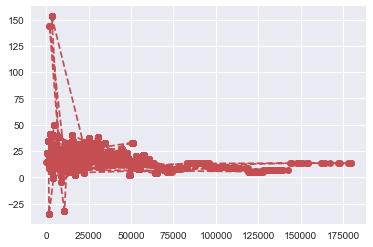

In [167]:
plt.plot(df['TrafficForecast'],df['LowerLimit'],'ro--')

In [119]:
grouped=pd.read_csv('flatdata_grouped_2.csv')
grouped

,TrafficForecast,count,mean,std,min,25%,50%,75%,max,LowerLimit,UpperLimit,Category,Median
0,169.99,343,59.577410,184.532592,0.000000,7.217021,16.279070,39.189257,1755.072464,43.186920,75.967899,"(169.999, 2850.0]",1870.0
1,2849.00,343,59.577410,184.532592,0.000000,7.217021,16.279070,39.189257,1755.072464,43.186920,75.967899,"(169.999, 2850.0]",NaN
2,2850.00,345,72.434665,185.619750,0.000000,8.082409,22.500000,56.403270,2142.424242,55.995470,88.873860,"(2850.0, 4800.0]",3820.0
3,4799.00,345,72.434665,185.619750,0.000000,8.082409,22.500000,56.403270,2142.424242,55.995470,88.873860,"(2850.0, 4800.0]",NaN
4,4800.00,339,45.253134,117.981410,0.000000,10.745415,20.204153,39.410700,1186.956522,34.712187,55.794081,"(4800.0, 6900.0]",5940.0
5,6899.00,339,45.253134,117.981410,0.000000,10.745415,20.204153,39.410700,1186.956522,34.712187,55.794081,"(4800.0, 6900.0]",NaN
6,6900.00,344,37.466641,108.330773,0.000000,7.988636,18.087847,35.714286,1328.571429,27.858519,47.074763,"(6900.0, 9000.0]",8100.0
7,8999.00,344,37.466641,108.330773,0.000000,7.988636,18.087847,35.714286,1328.571429,27.858519,47.074763,"(6900.0, 9000.0]",NaN
8,9000.00,336,28.359897,62.646904,0.000000,8.664117,20.088056,37.300532,1096.781076,22.737832,33.981962,"(9000.0, 11370.0]",10100.0
9,11369.00,336,28.359897,62.646904,0.000000,8.664117,20.088056,37.300532,1096.781076,22.737832,33.981962,"(9000.0, 11370.0]",NaN


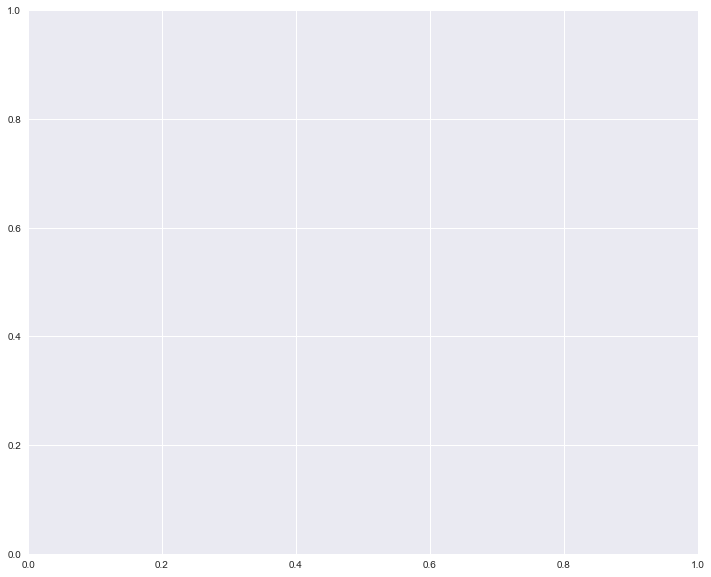

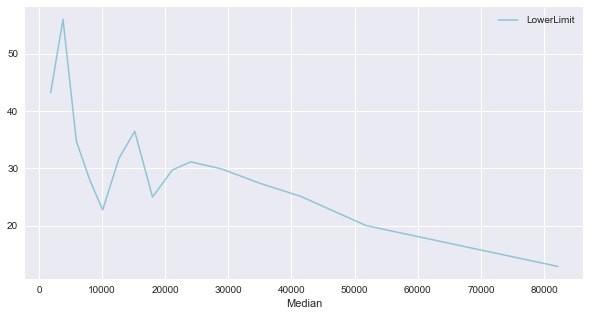

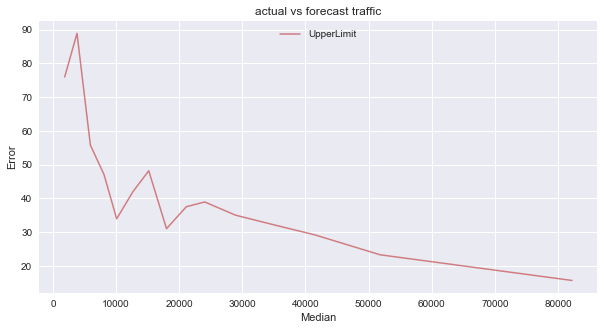

In [105]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 10)

ax = grouped.plot(x='Median',y='LowerLimit',kind='line',
                    figsize=[10, 5],
                    linewidth=1.5, 
                    alpha=0.7,
                    
                    color='c')

ax = grouped.plot(x='Median',y='UpperLimit',kind='line',
                    figsize=[10, 5],
                    linewidth=1.5, 
                    alpha=0.7,
                    
                    color='r')
#ax.plot(df['Traffic Forecast'])
#ax.plot(df['Opening Year Actual Count'])

ax.set_title("actual vs forecast traffic")
ax.set_xlabel('Median')
ax.set_ylabel('Error')
#ax.set_facecolor(axis_bgcolor)
plt.legend(loc='upper center')

plt.show()

#ax=grouped.plot(x='Median',y='LowerLimit',kind='line')
#ax=grouped.plot(x='Median',y='UpperLimit',kind='line')
#ax.set_xticklabels(df.TrafficForecast, rotation=90, rotation_mode='anchor', ha='right')
#ax=df['UpperLimit'].plot(kind='line')
#ax.set_xlim(0,200000)

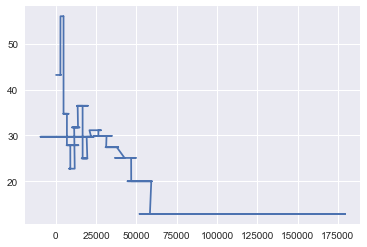

In [129]:
ax=plt.plot(newdf['AdjustedForecast'],newdf['LowerLimit'])
#ax=plt.plot(newdf['AdjustedForecast'],newdf['UpperLimit'])
#ax=sns.regplot(x="TrafficForecast", y="AbsPE", data=df)
#ax.set_ylim(0,200)

In [125]:
newdf=df.groupby('TrafficForecast').mean()
newdf

,AdjustedForecast,Count,ForecastMethodology,ForecastYear,ForecastYearType,FunctionalClass,ImprovementType,Length_miles,SegmentID,State,TollType,YearForecastProduced,Year_ofObservation,main_TrafficForecast_ProjectID,Error,PercentError,AbsPE,DiffYear,count,mean,std,min,25%,50%,75%,max,LowerLimit,UpperLimit
TrafficForecast,,,,,,,,,,,,,,,,,,,,,,,,,,,,
170,170.000000,130.000000,1.000000,2009.000000,1.0,5.000000,12.000000,NaN,NaN,58.000000,1.0,2008.000000,2009.000000,6464.000000,-40.000000,-23.529412,23.529412,1.000000,343.0,59.577410,184.532592,0.000000,7.217021,16.279070,39.189257,1755.072464,43.18692,75.967899
250,249.166667,250.000000,6.000000,2014.000000,NaN,5.000000,12.000000,NaN,NaN,41.000000,1.0,2012.000000,2013.000000,NaN,0.833333,0.334448,0.334448,2.000000,343.0,59.577410,184.532592,0.000000,7.217021,16.279070,39.189257,1755.072464,43.18692,75.967899
300,299.000000,550.000000,6.000000,2011.000000,NaN,5.000000,1.000000,NaN,NaN,41.000000,1.0,2009.000000,2009.000000,NaN,251.000000,83.946488,83.946488,2.000000,343.0,59.577410,184.532592,0.000000,7.217021,16.279070,39.189257,1755.072464,43.18692,75.967899
430,430.000000,450.000000,1.000000,2011.000000,1.0,5.000000,12.000000,NaN,NaN,58.000000,1.0,2010.000000,2011.000000,6637.000000,20.000000,4.651163,4.651163,1.000000,343.0,59.577410,184.532592,0.000000,7.217021,16.279070,39.189257,1755.072464,43.18692,75.967899
450,450.000000,440.000000,1.000000,2009.000000,1.0,6.000000,12.000000,NaN,NaN,58.000000,1.0,2006.000000,2009.000000,6680.000000,-10.000000,-2.222222,2.222222,3.000000,343.0,59.577410,184.532592,0.000000,7.217021,16.279070,39.189257,1755.072464,43.18692,75.967899
470,470.000000,260.000000,4.000000,2010.000000,1.0,6.000000,12.000000,NaN,NaN,58.000000,1.0,2009.000000,2010.000000,6616.000000,-210.000000,-44.680851,44.680851,1.000000,343.0,59.577410,184.532592,0.000000,7.217021,16.279070,39.189257,1755.072464,43.18692,75.967899
480,480.000000,430.000000,1.000000,2010.000000,1.0,5.000000,12.000000,NaN,NaN,58.000000,1.0,2007.000000,2010.000000,6383.000000,-50.000000,-10.416667,10.416667,3.000000,343.0,59.577410,184.532592,0.000000,7.217021,16.279070,39.189257,1755.072464,43.18692,75.967899
540,531.000000,520.000000,3.500000,2010.500000,1.0,5.500000,6.500000,NaN,NaN,49.500000,1.0,2009.500000,2009.000000,6681.000000,-11.000000,-2.522350,26.596424,1.000000,343.0,59.577410,184.532592,0.000000,7.217021,16.279070,39.189257,1755.072464,43.18692,75.967899
550,550.000000,446.000000,6.000000,2014.000000,NaN,5.000000,12.000000,NaN,NaN,41.000000,1.0,2012.000000,2015.000000,NaN,-104.000000,-18.909091,18.909091,2.000000,343.0,59.577410,184.532592,0.000000,7.217021,16.279070,39.189257,1755.072464,43.18692,75.967899


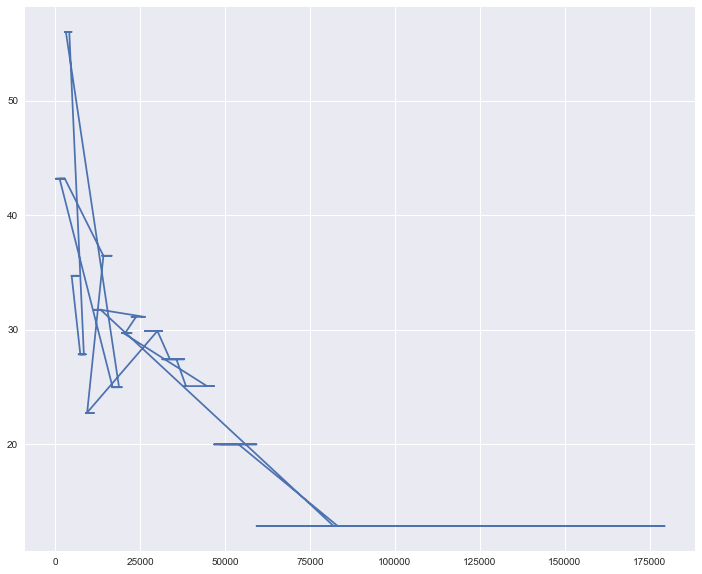

In [137]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 10)
ax=plt.plot(df['TrafficForecast'],df['LowerLimit'])
#ax.set_size_inches(15,10)
#ax.set_xlim(20,40)
#ax.set_ylim(-50,200)

In [143]:
flatdata_adjusted.groupby('TrafficForecast').AbsPE.describe()

,count,mean,std,min,25%,50%,75%,max
TrafficForecast,,,,,,,,
170,1.0,23.529412,NaN,23.529412,23.529412,23.529412,23.529412,23.529412
250,1.0,0.334448,NaN,0.334448,0.334448,0.334448,0.334448,0.334448
300,1.0,83.946488,NaN,83.946488,83.946488,83.946488,83.946488,83.946488
430,1.0,4.651163,NaN,4.651163,4.651163,4.651163,4.651163,4.651163
450,1.0,2.222222,NaN,2.222222,2.222222,2.222222,2.222222,2.222222
470,1.0,44.680851,NaN,44.680851,44.680851,44.680851,44.680851,44.680851
480,1.0,10.416667,NaN,10.416667,10.416667,10.416667,10.416667,10.416667
540,2.0,26.596424,3.567141,24.074074,25.335249,26.596424,27.857599,29.118774
550,1.0,18.909091,NaN,18.909091,18.909091,18.909091,18.909091,18.909091


In [152]:
grouped_tf=flatdata_adjusted.groupby(pd.qcut(flatdata_adjusted['TrafficForecast'], 250)).AbsPE.describe()
grouped_tf

,count,mean,std,min,25%,50%,75%,max
TrafficForecast,,,,,,,,
"(169.999, 689.36]",21.0,21.991252,19.813928,0.334448,8.661417,18.909091,29.118774,83.946488
"(689.36, 800.0]",22.0,35.144603,35.496805,0.420168,8.762928,20.032895,74.136513,97.916667
"(800.0, 1032.12]",19.0,27.748898,33.068747,3.491272,9.726808,16.470588,32.922439,146.464647
"(1032.12, 1200.0]",25.0,107.918478,222.674626,0.000000,2.994012,20.426829,45.454545,852.380952
"(1200.0, 1350.0]",18.0,25.242977,25.997030,0.000000,8.489305,16.636308,33.700791,85.950413
"(1350.0, 1500.0]",24.0,29.515078,36.784174,0.000000,5.000000,20.000000,31.240087,146.666667
"(1500.0, 1685.52]",15.0,16.463065,14.027508,0.000000,7.107889,12.143331,24.105360,50.880829
"(1685.52, 1800.0]",21.0,101.260777,379.336614,0.000000,7.682964,11.764706,30.769231,1755.072464
"(1800.0, 1972.12]",20.0,12.475500,11.147537,0.000000,4.960162,10.087909,17.055725,38.715694


In [153]:
grouped_tf=grouped_tf.assign(LowerLimit=grouped_tf['mean']-1.645*grouped_tf['std']/np.sqrt(grouped_tf['count']))
grouped_tf

,count,mean,std,min,25%,50%,75%,max,LowerLimit
TrafficForecast,,,,,,,,,
"(169.999, 689.36]",21.0,21.991252,19.813928,0.334448,8.661417,18.909091,29.118774,83.946488,14.878678
"(689.36, 800.0]",22.0,35.144603,35.496805,0.420168,8.762928,20.032895,74.136513,97.916667,22.695335
"(800.0, 1032.12]",19.0,27.748898,33.068747,3.491272,9.726808,16.470588,32.922439,146.464647,15.269121
"(1032.12, 1200.0]",25.0,107.918478,222.674626,0.000000,2.994012,20.426829,45.454545,852.380952,34.658526
"(1200.0, 1350.0]",18.0,25.242977,25.997030,0.000000,8.489305,16.636308,33.700791,85.950413,15.163143
"(1350.0, 1500.0]",24.0,29.515078,36.784174,0.000000,5.000000,20.000000,31.240087,146.666667,17.163533
"(1500.0, 1685.52]",15.0,16.463065,14.027508,0.000000,7.107889,12.143331,24.105360,50.880829,10.505060
"(1685.52, 1800.0]",21.0,101.260777,379.336614,0.000000,7.682964,11.764706,30.769231,1755.072464,-34.909092
"(1800.0, 1972.12]",20.0,12.475500,11.147537,0.000000,4.960162,10.087909,17.055725,38.715694,8.375066


In [154]:
grouped_tf=grouped_tf.assign(UpperLimit=grouped_tf['mean']+1.645*grouped_tf['std']/np.sqrt(grouped_tf['count']))
grouped_tf

,count,mean,std,min,25%,50%,75%,max,LowerLimit,UpperLimit
TrafficForecast,,,,,,,,,,
"(169.999, 689.36]",21.0,21.991252,19.813928,0.334448,8.661417,18.909091,29.118774,83.946488,14.878678,29.103827
"(689.36, 800.0]",22.0,35.144603,35.496805,0.420168,8.762928,20.032895,74.136513,97.916667,22.695335,47.593872
"(800.0, 1032.12]",19.0,27.748898,33.068747,3.491272,9.726808,16.470588,32.922439,146.464647,15.269121,40.228676
"(1032.12, 1200.0]",25.0,107.918478,222.674626,0.000000,2.994012,20.426829,45.454545,852.380952,34.658526,181.178430
"(1200.0, 1350.0]",18.0,25.242977,25.997030,0.000000,8.489305,16.636308,33.700791,85.950413,15.163143,35.322811
"(1350.0, 1500.0]",24.0,29.515078,36.784174,0.000000,5.000000,20.000000,31.240087,146.666667,17.163533,41.866623
"(1500.0, 1685.52]",15.0,16.463065,14.027508,0.000000,7.107889,12.143331,24.105360,50.880829,10.505060,22.421069
"(1685.52, 1800.0]",21.0,101.260777,379.336614,0.000000,7.682964,11.764706,30.769231,1755.072464,-34.909092,237.430645
"(1800.0, 1972.12]",20.0,12.475500,11.147537,0.000000,4.960162,10.087909,17.055725,38.715694,8.375066,16.575934


In [8]:
flatdata_adjusted[flatdata_adjusted['AbsPE']>500]

,AdjustedForecast,BriefDescription,Count,County,ForecastMethodology,ForecastYear,ForecastYearType,FunctionalClass,ImprovementType,InternalProjectID,Length_miles,SegmentDescription,SegmentID,State,TollType,TrafficForecast,YearForecastProduced,Year_ofObservation,main_ProjectInformation_ProjectID,main_TrafficForecast_ProjectID,Error,PercentError,AbsPE
464,4000.0,I-394-Third Ave Distributor from 13th Street N...,32000,Hennepin,1,2000,1.0,8,12,SPAR-202,NaN,", , ,",NaN,28,1,4000,1978.0,2000,28-6695-SPAR-202-I-394-Third Ave Distributor f...,6695.0,28000.0,700.000000,700.000000
465,3925.0,I-394-Third Ave Distributor from 13th Street N...,32000,Hennepin,1,2000,1.0,8,12,SPAR-202,0.080,", , , I-3947th6thEB",NaN,28,1,3925,1978.0,2000,28-6696-SPAR-202-I-394-Third Ave Distributor f...,6696.0,28075.0,715.286624,715.286624
467,1725.0,I-394-Third Ave Distributor from 13th Street N...,32000,Hennepin,1,2000,1.0,8,12,SPAR-202,NaN,", , ,",NaN,28,1,1725,1978.0,2000,28-6698-SPAR-202-I-394-Third Ave Distributor f...,6698.0,30275.0,1755.072464,1755.072464
469,4300.0,I-394-Third Ave Distributor from 13th Street N...,32000,Hennepin,1,2000,1.0,8,12,SPAR-202,NaN,", , ,",NaN,28,1,4300,1978.0,2000,28-6700-SPAR-202-I-394-Third Ave Distributor f...,6700.0,27700.0,644.186046,644.186046
470,2000.0,I-394-Third Ave Distributor from 13th Street N...,32000,Hennepin,1,2000,1.0,8,12,SPAR-202,0.080,", , , I-3946th5thEB",NaN,28,1,2000,1978.0,2000,28-6701-SPAR-202-I-394-Third Ave Distributor f...,6701.0,30000.0,1500.000000,1500.000000
471,2000.0,I-394-Third Ave Distributor from 13th Street N...,32000,Hennepin,1,2000,1.0,8,12,SPAR-202,0.080,", , , I-3956th5thWB",NaN,28,1,2000,1978.0,2000,28-6702-SPAR-202-I-394-Third Ave Distributor f...,6702.0,30000.0,1500.000000,1500.000000
472,3350.0,I-394-Third Ave Distributor from 13th Street N...,32000,Hennepin,1,2000,1.0,8,12,SPAR-202,0.080,", , , I-3945th4thWB",NaN,28,1,3350,1978.0,2000,28-6703-SPAR-202-I-394-Third Ave Distributor f...,6703.0,28650.0,855.223881,855.223881
473,2000.0,I-394-Third Ave Distributor from 13th Street N...,32000,Hennepin,1,2000,1.0,8,12,SPAR-202,0.080,", , , I-3944th3rdEB",NaN,28,1,2000,1978.0,2000,28-6704-SPAR-202-I-394-Third Ave Distributor f...,6704.0,30000.0,1500.000000,1500.000000
474,3350.0,I-394-Third Ave Distributor from 13th Street N...,32000,Hennepin,1,2000,1.0,8,12,SPAR-202,NaN,", , ,",NaN,28,1,3350,1978.0,2000,28-6705-SPAR-202-I-394-Third Ave Distributor f...,6705.0,28650.0,855.223881,855.223881
475,3350.0,I-394-Third Ave Distributor from 13th Street N...,32000,Hennepin,1,2000,1.0,8,12,SPAR-202,0.080,", , , I-3944th3rdWB",NaN,28,1,3350,1978.0,2000,28-6706-SPAR-202-I-394-Third Ave Distributor f...,6706.0,28650.0,855.223881,855.223881


In [10]:
flatdata=pd.read_csv('Flatdata.csv',encoding='latin-1')
flatdata

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,State,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count
0,IR71/US 30 interchange Modification,NaN,1.0,NaN,41.0,11378,41-2-11378-IR71/US 30 interchange Modification,Richland,1,2000.0,37190,1.0,1994.0,6,", , RIC7119.08",2,NaN,2000,42310
1,IR71/US 30 interchange Modification,NaN,1.0,NaN,41.0,11378,41-2-11378-IR71/US 30 interchange Modification,Richland,1,2020.0,45190,3.0,1994.0,6,", , RIC7119.08",2,NaN,2008,39760
2,IR71/US 30 interchange Modification,NaN,3.0,NaN,41.0,11378,41-3-11378-IR71/US 30 interchange Modification,Richland,1,2000.0,12920,1.0,1994.0,6,", , RIC3017.2",3,NaN,2000,15780
3,IR71/US 30 interchange Modification,NaN,3.0,NaN,41.0,11378,41-3-11378-IR71/US 30 interchange Modification,Richland,1,2020.0,17390,3.0,1994.0,6,", , RIC3017.2",3,NaN,2008,15630
4,IR71/US 30 interchange Modification,NaN,1.0,NaN,41.0,11378,41-4-11378-IR71/US 30 interchange Modification,Richland,1,2000.0,37820,1.0,1994.0,6,", , RIC7118.78",4,NaN,2000,42450
5,IR71/US 30 interchange Modification,NaN,1.0,NaN,41.0,11378,41-4-11378-IR71/US 30 interchange Modification,Richland,1,2020.0,46060,3.0,1994.0,6,", , RIC7118.78",4,NaN,2008,39290
6,IR71/US 30 interchange Modification,NaN,1.0,NaN,41.0,11378,41-5-11378-IR71/US 30 interchange Modification,Richland,1,2000.0,16430,1.0,1994.0,6,", , RIC3016.87",5,NaN,2000,16530
7,IR71/US 30 interchange Modification,NaN,1.0,NaN,41.0,11378,41-5-11378-IR71/US 30 interchange Modification,Richland,1,2020.0,22090,3.0,1994.0,6,", , RIC3016.87",5,NaN,2008,18210
8,TUS-0036-15.730,NaN,3.0,NaN,41.0,19055,41-6-19055-TUS-0036-15.730,Tuscarawas,1,2000.0,8990,1.0,1999.0,6,", , TUS3615.73",6,NaN,2000,9100
9,TUS-0036-15.730,NaN,3.0,NaN,41.0,19055,41-6-19055-TUS-0036-15.730,Tuscarawas,1,2020.0,11530,3.0,1999.0,6,", , TUS3615.73",6,NaN,2010,8960


In [11]:
flatdata[flatdata['Count'].isnull()]

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,State,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count
